# Analysis of the Stroop Effect

## Introduction

The Stroop Effect is the demonstration of inference in the reaction time of a task.

The test revoles around an individual calling out the color of ink a word is written in.

The test is administered in two phases:

    The first phase involves congruent words and colors, in other words the word BLUE is written in BLUE ink.
    
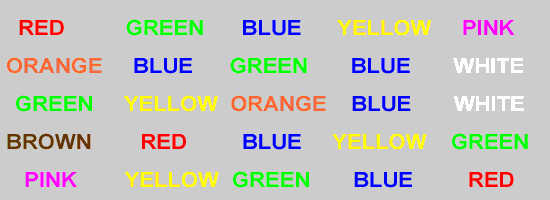

    The second phase involves incongruent words and colors, or better said, the word BLUE is written in RED ink.
    
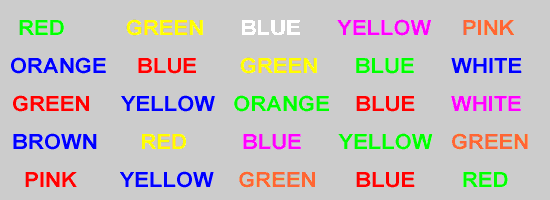

The length of time is measured in how long it takes the individual to call out the correct color of ink in equally sized lists.

## Investigation

 - **Dependant Variable:** The dependant variable in this study is the response time of the individual in seconds for each of the condition of the word sets (either congruent or incongruent)
 
 
 - **Independant Variable:** The independant variable in this study is the condition of the word set (either congruent or incongruent)
 



### Testing Method

A Dependant Sample t-Test should be used for this study. We will use a two-tailed test using a sginifigance level of 0.05. A Dependant Sample t_Test compares the means of two related groups and determines if there is a statistically significant difference between them. This type of test relies on one dependant variable measured on an interval (how long it takes to correctly idnetify the color of ink the word is written in) and one categorical variable that has two related groups (the individuals participating in the study). 

The t-test is most appropriate as we do not know the populations standard deviation before hand and will be comapring results between two populations (the population results of the congruent test vs the populations result of the incongruent test). Aditionally, our sample size is limited at just 24 participants. Had we known the populations standard deviation, a z-test may have been appropriate.

### Hypothesis

There are two hypothesis for this study.

**Null Hypothesis** - The mean of the participant population time completion in seconds for the Incongruent word set is equal to the mean of the participant population time completion in seconds for the Congruant word set. This can be expressed as:

### **H$_{0}$: $\mu$$_{i}$ = $\mu$$_{c}$**

**Alternate Hypothesis** - The mean of the participant population time completion in seconds for the Incongruent word set is different to the mean of the participant population time completion in seconds for the Congruant word set. This can be expressed as:

### **H$_{A}$: $\mu$$_{i}$ $\neq$ $\mu$$_{c}$**
    

## Analysis

Let's import the necessary Python libraries to perform our analysis

In [1]:
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [2]:
# set matplotlib figure size to something easier to look at
plt.rcParams['figure.dpi'] = 100

We will start by createing a dataframe containing our Stroop data.

In [3]:
# create pandas dataframe from our csv dataset
stroop_data = pd.read_csv('stroopdata.csv')

In [4]:
# view the first few rows of the dataframe
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Since our index starts at zero, we will create a participants column and assign a value of index + 1 to it.

Now lets have a look at a statistical view of our data.

In [5]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Now we will have a look at this data represented as a Boxplot for an easier visual analysis.

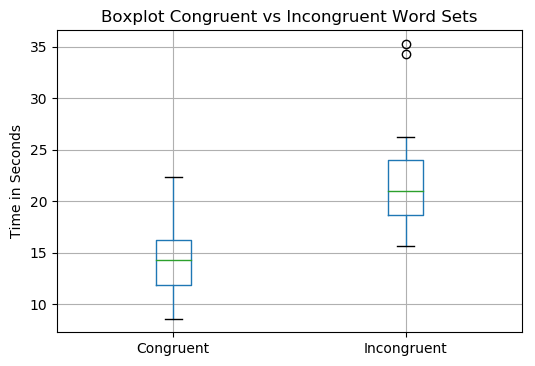

In [6]:
# create boxplot from dataframe
plt.title('Boxplot Congruent vs Incongruent Word Sets')
plt.ylabel('Time in Seconds')

stroop_data.boxplot(['Congruent', 'Incongruent'])
plt.show()

We can clearly see there is a difference between the congruent and incongruent word sets.

Next we can take a look at the Histograms for each word set.

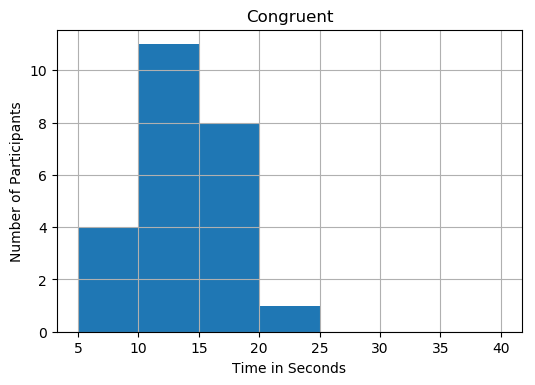

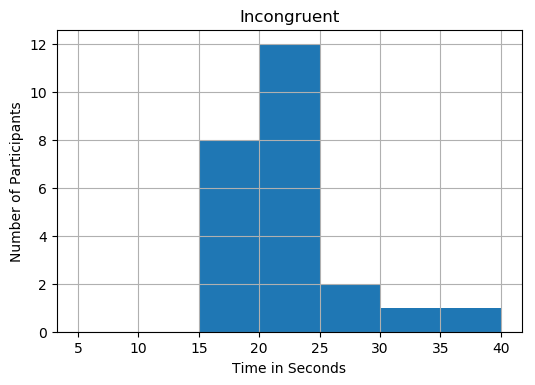

In [7]:
# function to create histograms from dataframe, column
def create_hist(df, col):
    df.hist(column = col, bins = [5,10,15,20,25,30,35,40])
    plt.ylabel('Number of Participants')
    plt.xlabel('Time in Seconds')
    plt.show()

# pass dataframe, column to the function
create_hist(stroop_data, 'Congruent')
create_hist(stroop_data, 'Incongruent')

From the above historgrams we see that there is definite differnece between the time (in seconds) when completing the congruent and incongruent word lists. Participants were able to complete the congruent word list quicker.

## Statistical Test

We'll start by calculating the difference between the congruent test and the incongruent test for each participant and store the value in the dataframe.

Difference = Incongruent - Congruent

In [8]:
# calculate the difference between the Incongruent test and the Congruent test
stroop_data['Diff'] = stroop_data['Incongruent'] - stroop_data['Congruent']

stroop_data.head()

,Congruent,Incongruent,Diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


Next we will calculate the deviation for each particpant.

Deviation = Diffirence - Mean of all Differences

In [9]:
# calculat the deviation between the differnece and the mean of all differences
stroop_data['Dev'] = stroop_data['Diff'] - stroop_data['Diff'].mean()

stroop_data.head()

,Congruent,Incongruent,Diff,Dev
0,12.079,19.278,7.199,-0.765792
1,16.791,18.741,1.950,-6.014792
2,9.564,21.214,11.650,3.685208
3,8.630,15.687,7.057,-0.907792
4,14.669,22.803,8.134,0.169208


Then we will calculate the Squared Differences for each participant.

Square Deviation = Deviation * Deviation

In [10]:
# caluculate the Squared Deviation
stroop_data['SQD'] = stroop_data['Dev'] * stroop_data['Dev']

stroop_data.head()

,Congruent,Incongruent,Diff,Dev,SQD
0,12.079,19.278,7.199,-0.765792,0.586437
1,16.791,18.741,1.950,-6.014792,36.177719
2,9.564,21.214,11.650,3.685208,13.580760
3,8.630,15.687,7.057,-0.907792,0.824086
4,14.669,22.803,8.134,0.169208,0.028631


Next lets calculate the difference of the Congruent mean and the Incongruent mean as the Mean.

In [11]:
# create variables to hold the mean of Congruent data and Incongruent data respectively
c_mean = stroop_data['Congruent'].mean()
i_mean = stroop_data['Incongruent'].mean()

# calculate the mean
mean = i_mean - c_mean

print(round(mean, 2))

7.96


The Mean is expressed as:

### M: 7.96

Now we will calculate the Sum of the Squared Differences.

In [12]:
sum_sqr_diff = stroop_data['SQD'].sum()

print(round(sum_sqr_diff, 2))

544.33


The Sum of Squares is expressed as:

### SS: 544.33

Lets calculate our Sample Variance now.

In [13]:
# get number of participants
n = len(stroop_data)

sample_var = sum_sqr_diff / (n - 1)

print(round(sample_var, 2))

23.67


The Sample Variance is the Sum of Squares divided by the Degrees of Freedom (sample size minus 1). This is expressed as:

### S$^{2}$ = SS/df 
### S$^{2}$ = 544.33 / (24-1) = 23.67

Next we can calculate the Mean of the Sample Variance.

In [14]:
sample_var_mean = sample_var / n

print(round(sample_var_mean, 2))

0.99


The Mean of the Sample Variance can be calculated by dividing the Sample Varience by the Sample Size. This is expressed as:

### S$^{2}$$_{M}$ = S$^{2}$ / N
### S$^{2}$$_{M}$ = 23.67 / 24 = 0.99

In [15]:
sample_var_mean_std_dev = sqrt(sample_var_mean)

print(round(sample_var_mean_std_dev, 2))

0.99


The Sample Variation Standard Deviation can be calculated by finding the square root of the Sample Variance Mean. This is expressed as:

### S$_{M}$ = $\sqrt{S^2_M}$

### S$_{M}$ = $\sqrt{0.99}$ = 0.99

Finally we can calculate our t value.

In [16]:
u = 0

t = (mean - u) / sample_var_mean_std_dev

print(t)

8.020706944109957


The formula to calculate the t value is expressed as:

### t = (M - $\mu$) / S$_{M}$

### t = (7.96 - 0) / 0.99 = 8.02

## Summary

The value of t is 8.020706944109957. The value of p is < 0.00001. The result is significant at p $\leq$ 0.05.

We reject the Null Hypothesis which states there is no difference in the time (in seconds) it takes an individual to correctly identify the color of ink between the congruent and incongruent word sets.

Based on this test it is expected that every individual that were to participate would show a signiificant differnece between the Congruant and Incongruent word sets.

The results are as I expected them to be and are inline with my own experience while perfroming the task.